In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.preprocessing import RobustScaler
from sklearn import model_selection

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier


from scipy.signal import savgol_filter

from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')


np.random.seed(0)

path = "training_data.csv"

data = pd.read_csv(path)
data = data.sample(frac=1)


target = 'Facies'
features = [feature for feature in list(data.head(0)) if feature not in ("Well Name", "Formation", "Facies")]


scaler = RobustScaler()
data[features] = scaler.fit_transform(data[features])

data = data.drop(["Formation", "Well Name"], axis=1)

data.head()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1462,4,-1.478836,0.895895,0.836123,0.986951,-0.407056,0.482917,1.0,0.499747
3103,7,0.873016,1.472246,-0.688898,0.303488,0.504379,-0.073750,1.0,0.655539
599,1,-0.288360,-0.377329,0.608039,-0.683274,-0.619835,-0.209583,0.0,-0.072838
2609,3,0.288360,-0.024199,-0.113870,-0.037960,-0.185025,-0.209583,0.0,-0.196257
2670,3,0.449735,0.770114,-0.882658,1.784104,0.974467,-0.209583,0.0,-0.285281


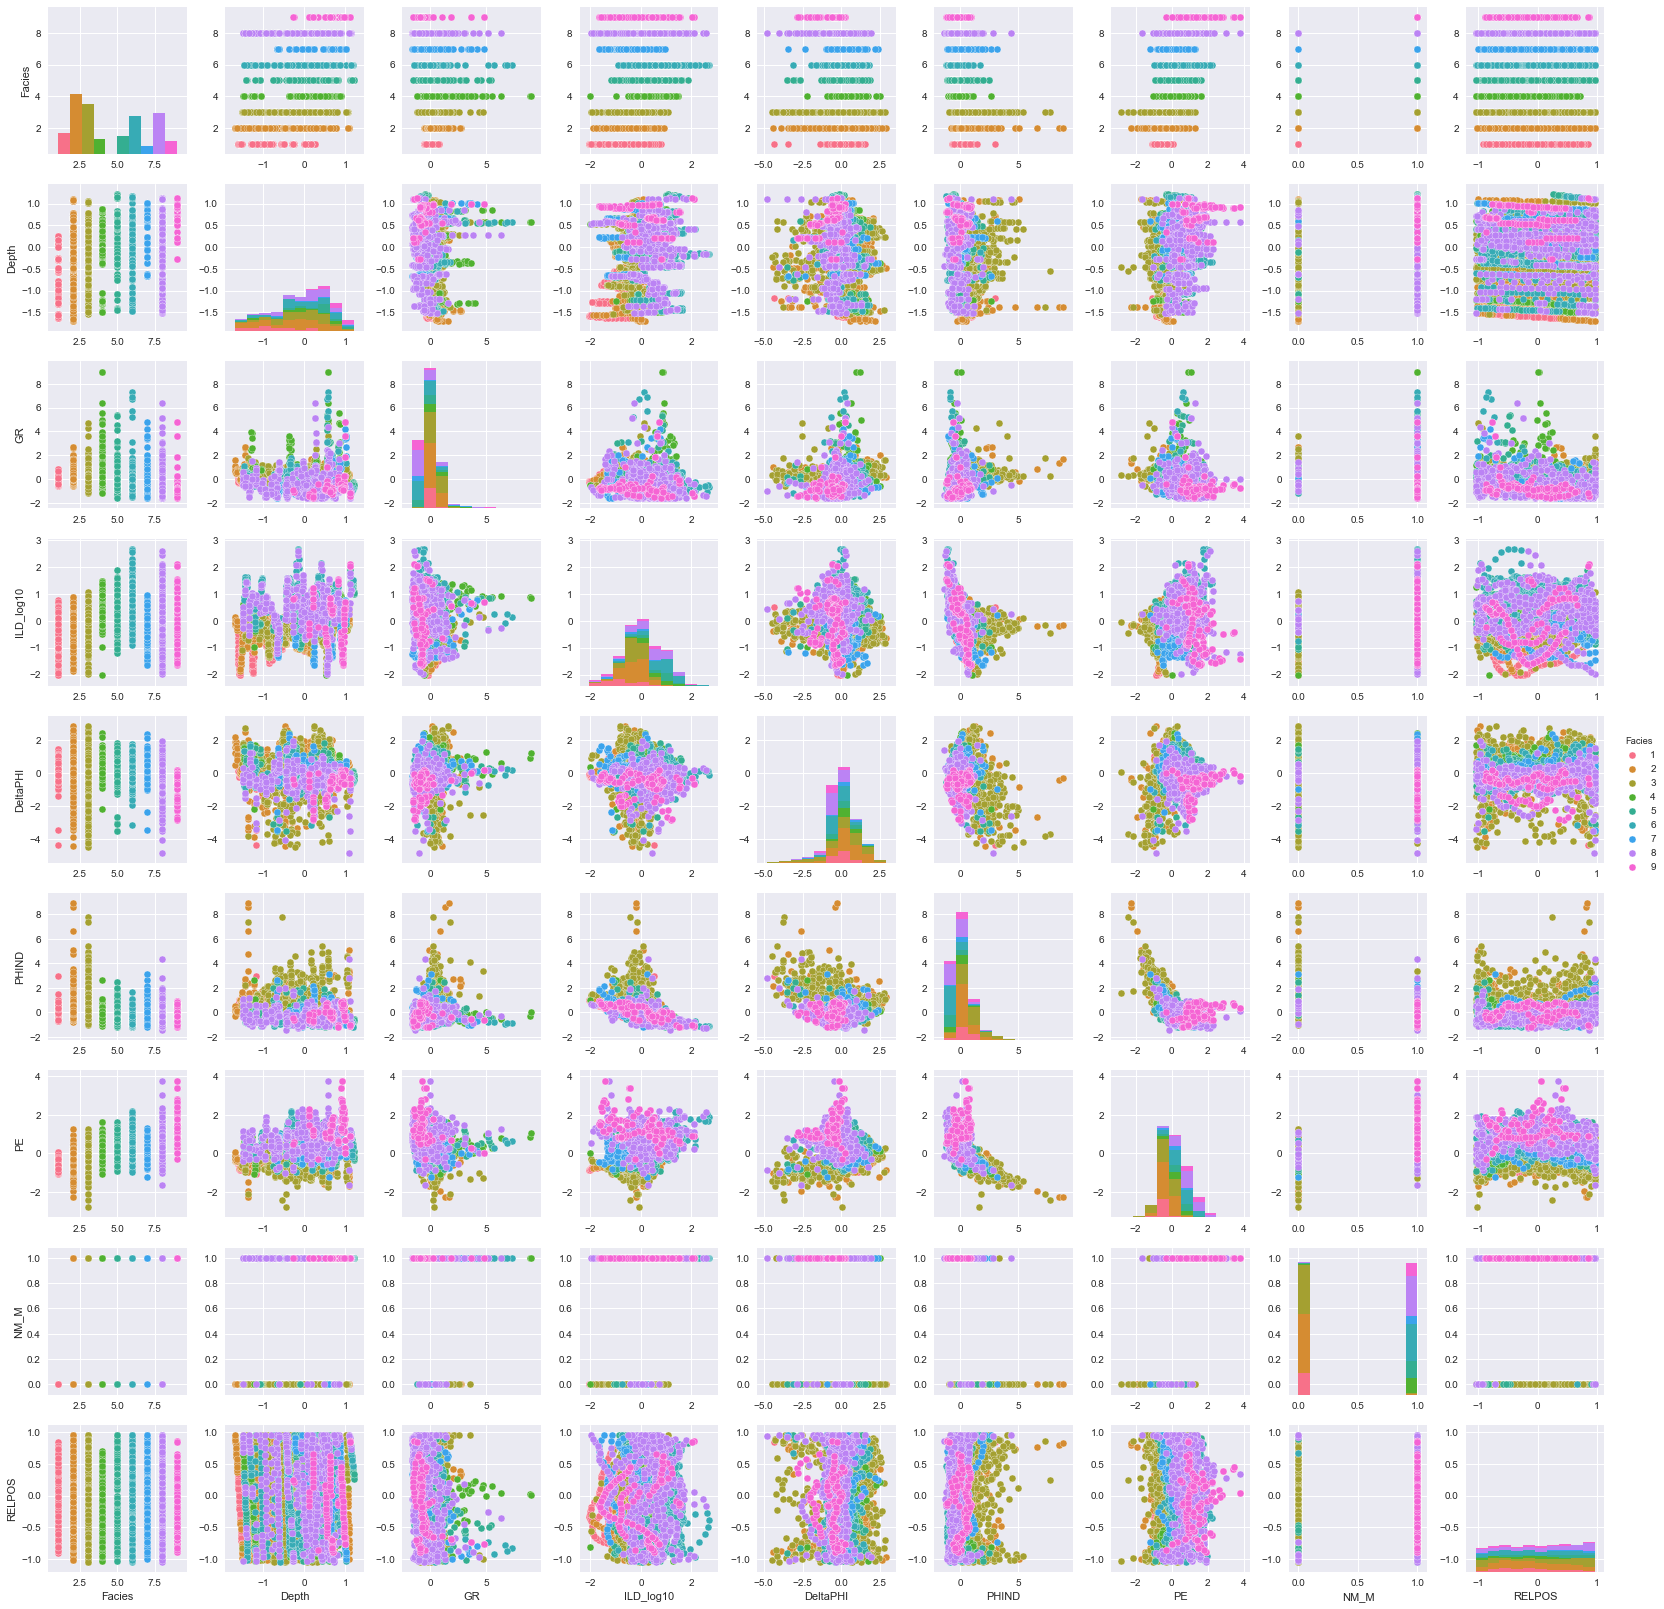

In [15]:
import seaborn as sns
g = sns.pairplot(data, hue="Facies")

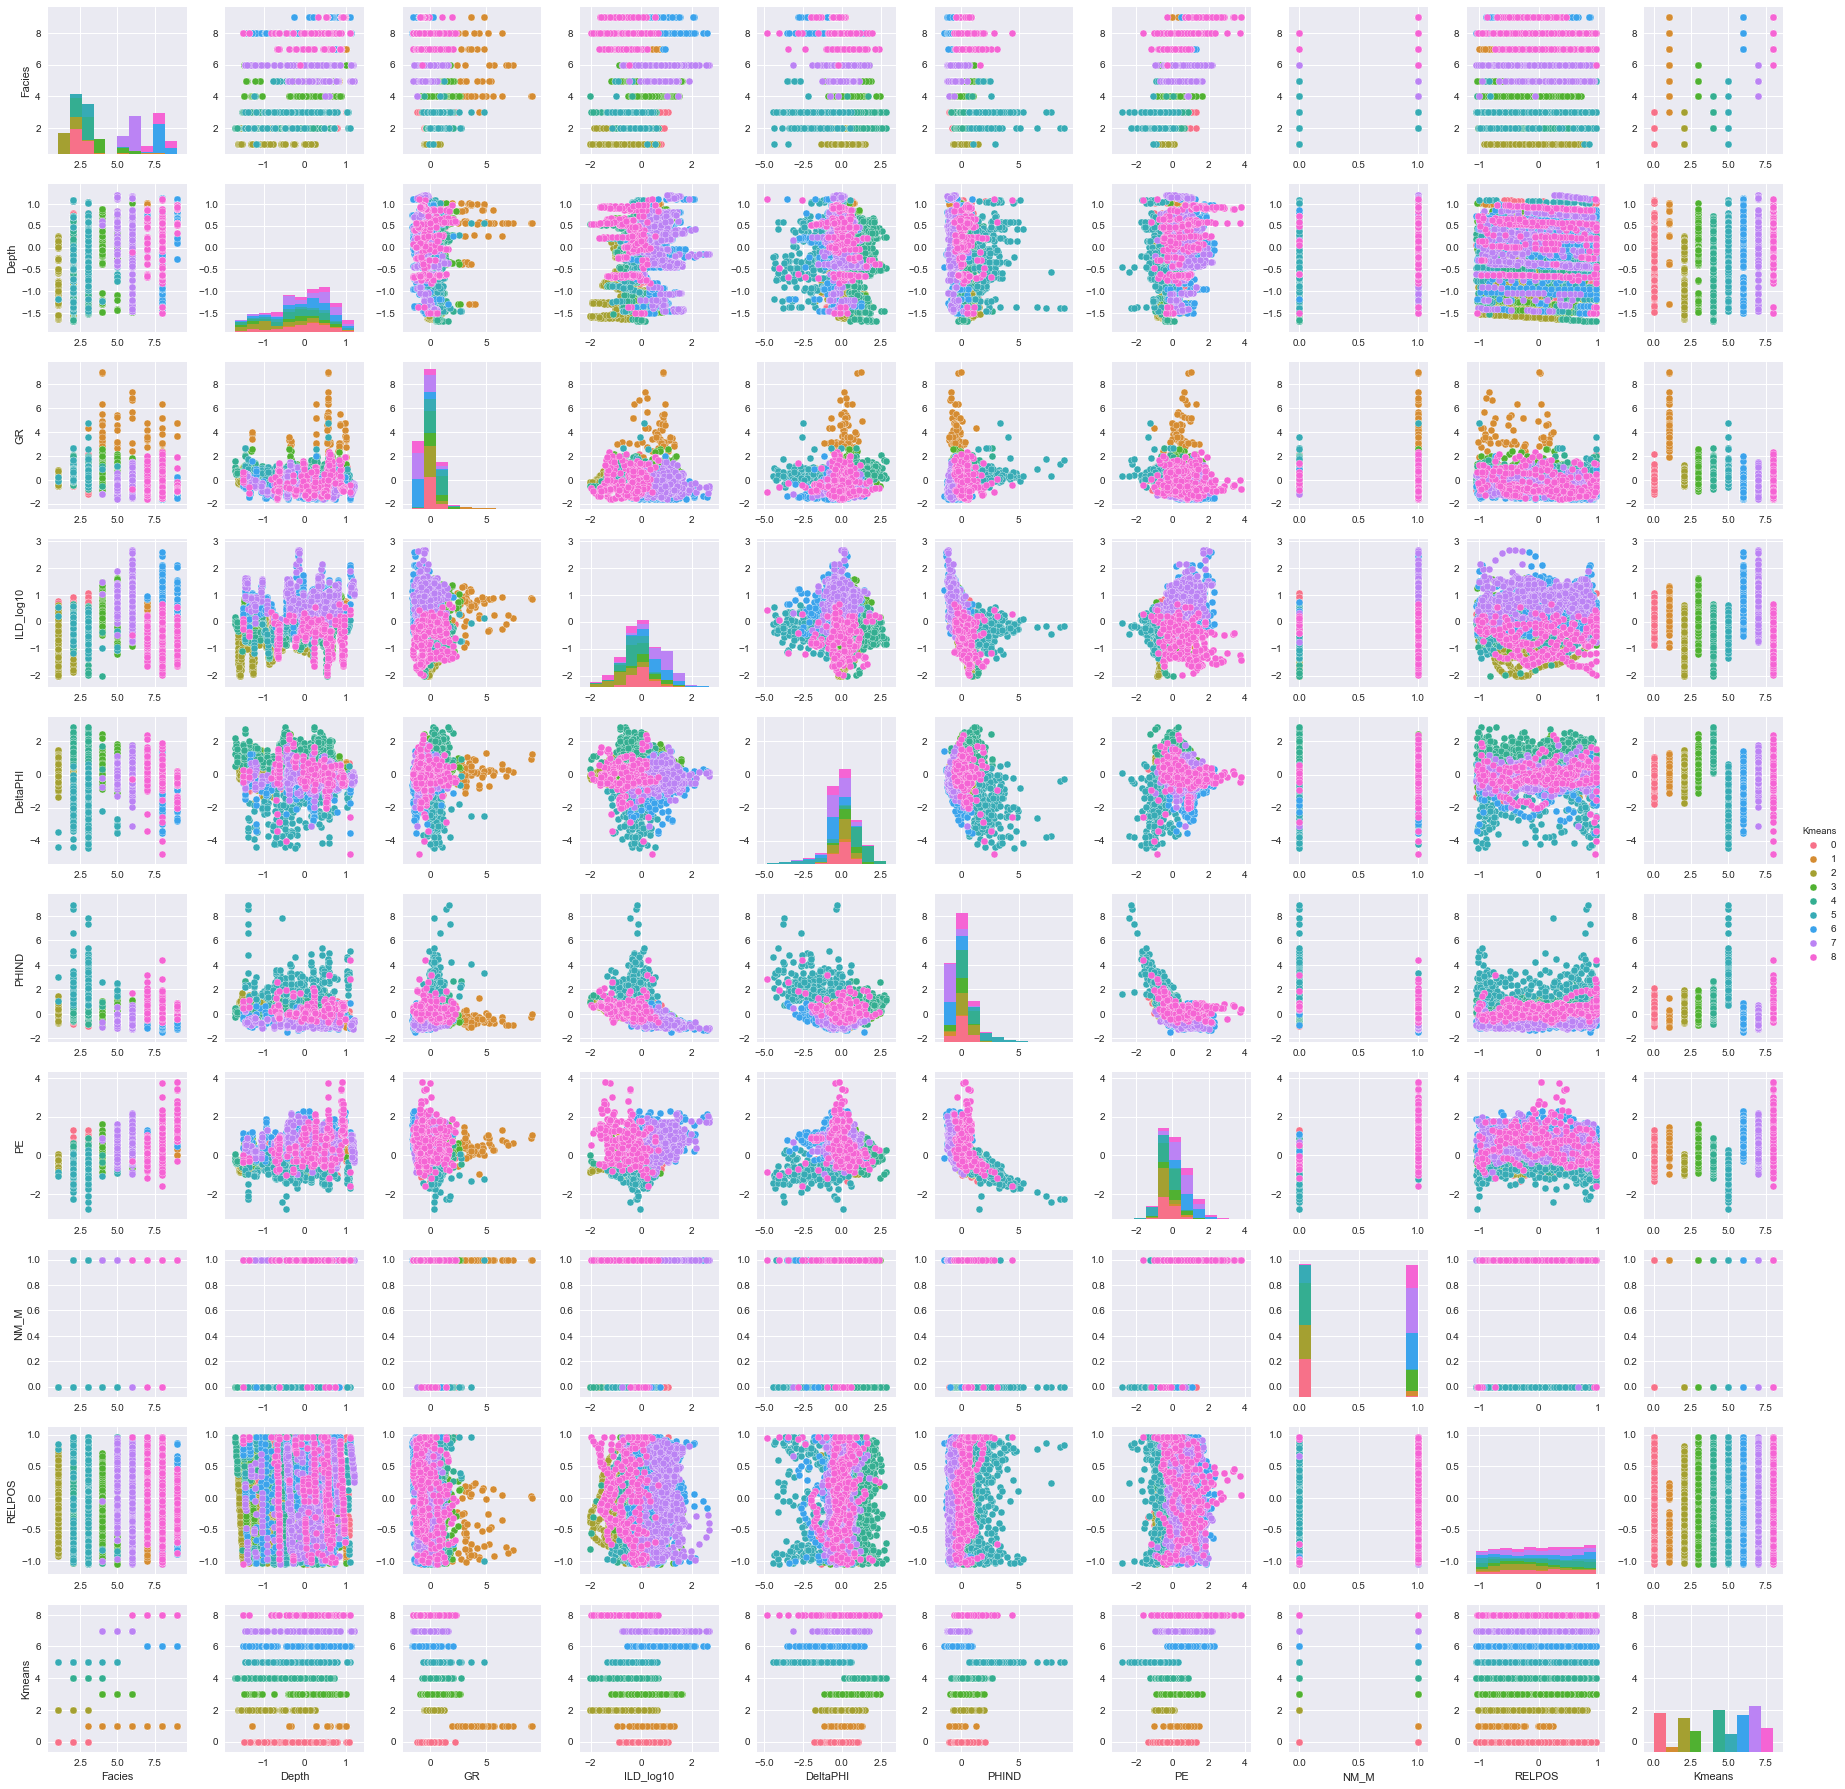

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=0).fit_predict(data)

data["Kmeans"] = kmeans

g = sns.pairplot(data, hue="Kmeans")